<a href="https://colab.research.google.com/github/FarrelEdric/12_2241720032_FransiscusFarrelEdricW/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fransiscus Farrel Edric W








In [34]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

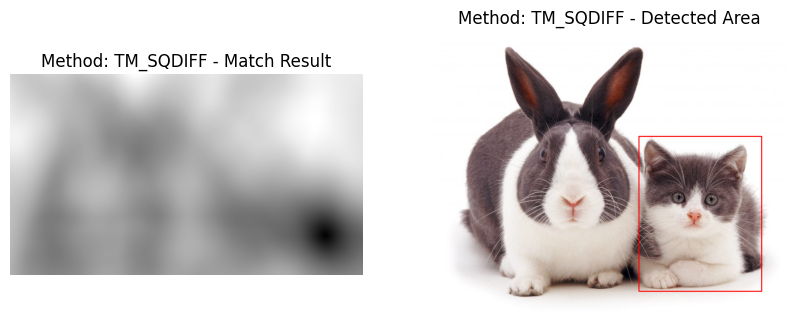

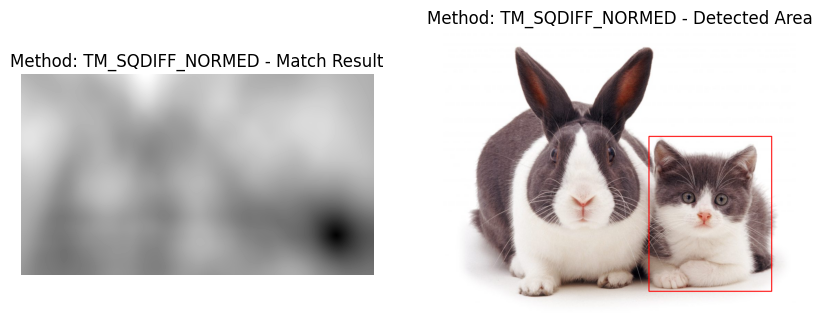

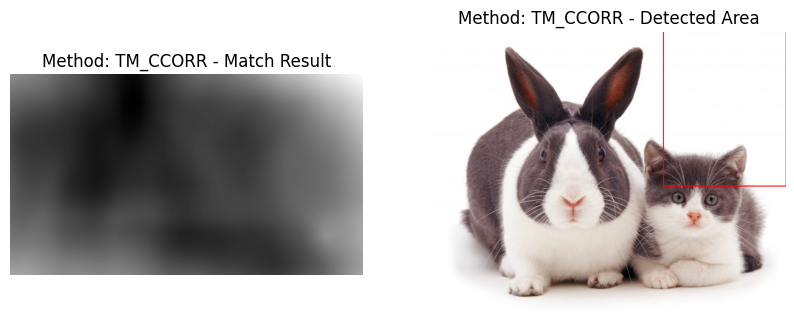

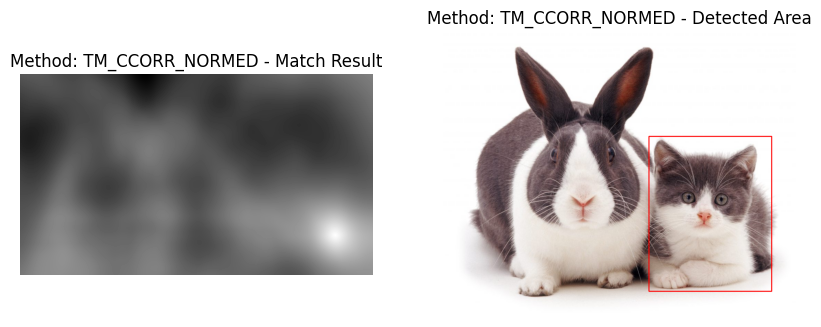

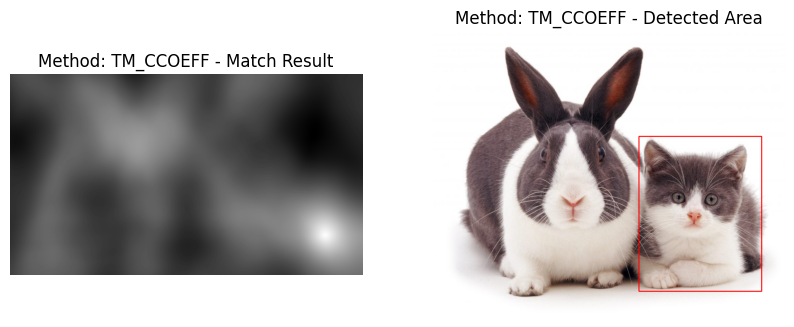

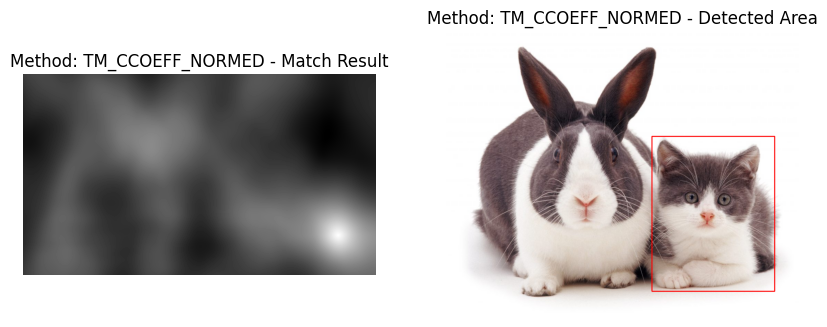

In [36]:
import cv2
import matplotlib.pyplot as plt

# Load gambar
input_img = cv2.imread('/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg', cv2.IMREAD_COLOR)
template_img = cv2.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg', cv2.IMREAD_COLOR)

# Verifikasi gambar berhasil di unggah atau tidak
if input_img is None:
    print("Error: Unable to load the input image.")
if template_img is None:
    print("Error: Unable to load the template image.")

# Continue if both images are loaded correctly
if input_img is not None and template_img is not None:

    # Convert to grayscale
    input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

    # Retrieve dimensions of the template
    template_height, template_width = template_gray.shape
    matching_methods = {
        "TM_SQDIFF": cv2.TM_SQDIFF,
        "TM_SQDIFF_NORMED": cv2.TM_SQDIFF_NORMED,
        "TM_CCORR": cv2.TM_CCORR,
        "TM_CCORR_NORMED": cv2.TM_CCORR_NORMED,
        "TM_CCOEFF": cv2.TM_CCOEFF,
        "TM_CCOEFF_NORMED": cv2.TM_CCOEFF_NORMED
    }

    # Melakukan iterasi
    for name, method in matching_methods.items():
        match_result = cv2.matchTemplate(input_gray, template_gray, method)
        min_value, max_value, min_location, max_location = cv2.minMaxLoc(match_result)
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left_corner = min_location
        else:
            top_left_corner = max_location

        # Hitung sudut kanan bawah persegi panjang
        bottom_right_corner = (top_left_corner[0] + template_width, top_left_corner[1] + template_height)

        result_image = input_img.copy()
        cv2.rectangle(result_image, top_left_corner, bottom_right_corner, (0, 0, 255), 2)

        plt.figure(figsize=(10, 5))

        # Result in grayscale
        plt.subplot(1, 2, 1)
        plt.title(f'Method: {name} - Match Result')
        plt.imshow(match_result, cmap='gray')
        plt.axis('off')

        # Menampilkan gambar asli dengan area yang terdeteksi disorot
        plt.subplot(1, 2, 2)
        plt.title(f'Method: {name} - Detected Area')
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.show()
else:
    print("Please verify the file paths and ensure images are accessible.")

3.
Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:


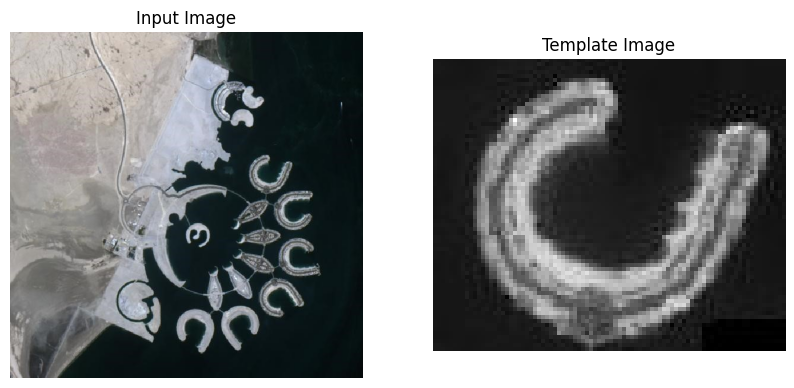

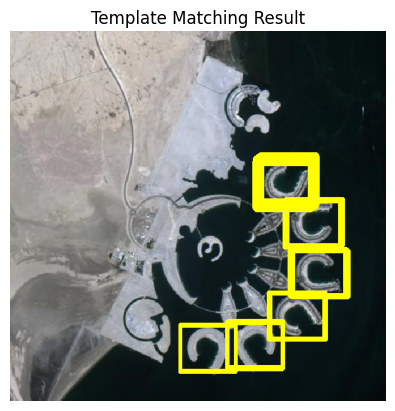

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan OpenCV untuk memuat gambar
img = cv2.imread('/content/drive/MyDrive/Images/Object Detection/bahrain.jpg')
template = cv2.imread('/content/drive/MyDrive/Images/Object Detection/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

# Mengkonversi gambar input ke grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Melakukan template matching
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Threshold untuk mendeteksi kecocokan
threshold = 0.43

# Lokasi kecocokan
loc = np.where(res >= threshold)

# Gambar kotak di setiap lokasi yang cocok
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

plt.subplot(122)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.axis('off')

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Template Matching Result')
plt.axis('off')

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

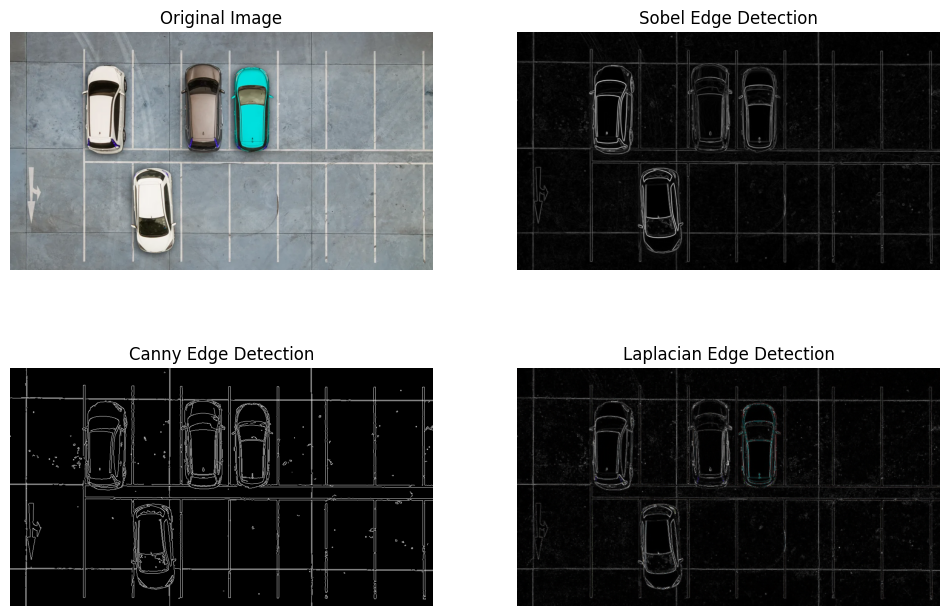

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
img = cv2.imread('/content/drive/MyDrive/Images/Object Detection/car-park.jpg')

# Mengkonversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Canny Edge Detection
canny = cv2.Canny(gray, 100, 200)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Results
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(img)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(sobel, cmap='gray')
ax[0, 1].set_title('Sobel Edge Detection')
ax[0, 1].axis('off')

ax[1, 0].imshow(canny, cmap='gray')
ax[1, 0].set_title('Canny Edge Detection')
ax[1, 0].axis('off')

ax[1, 1].imshow(laplacian, cmap='gray')
ax[1, 1].set_title('Laplacian Edge Detection')
ax[1, 1].axis('off')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

<ipython-input-39-a22557df46c1>:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)


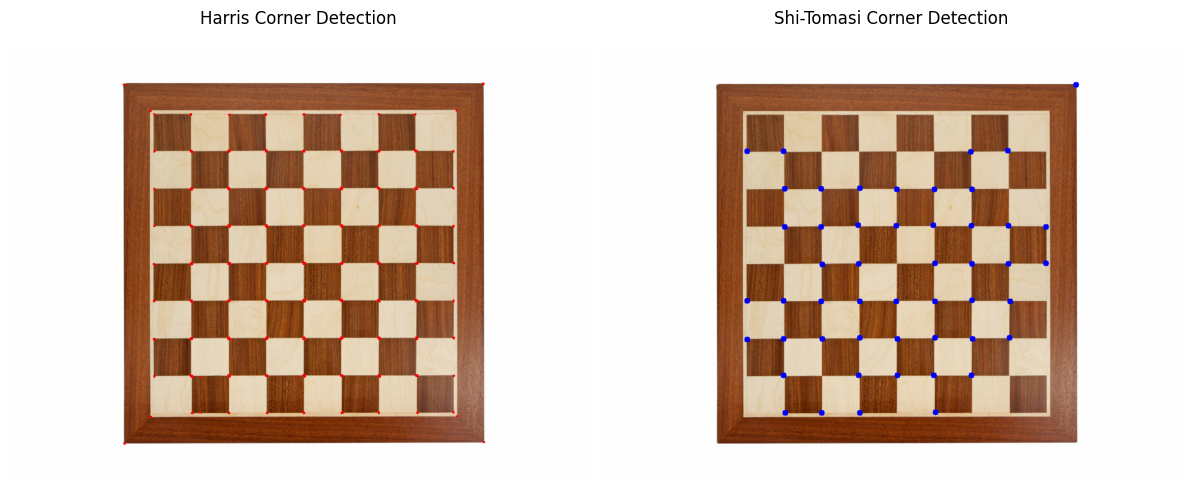

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
chess_board = cv2.imread('/content/drive/MyDrive/Images/Object Detection/chess-board.jpg')

# Mengkonversi ke grayscale
gray_chess_board = cv2.cvtColor(chess_board, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_response = cv2.cornerHarris(gray_chess_board, 2, 3, 0.04)
harris_response = cv2.dilate(harris_response, None)
chess_board_with_harris = chess_board.copy()
chess_board_with_harris[harris_response > 0.01 * harris_response.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray_chess_board, 50, 0.01, 10)
shi_tomasi_corners = np.int0(shi_tomasi_corners)
chess_board_with_shi_tomasi = chess_board.copy()
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(chess_board_with_shi_tomasi, (x, y), 5, (255, 0, 0), -1)

# Results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(chess_board_with_harris, cv2.COLOR_BGR2RGB))
ax[0].set_title('Harris Corner Detection')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(chess_board_with_shi_tomasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('Shi-Tomasi Corner Detection')
ax[1].axis('off')

plt.tight_layout()
plt.show()

6.
Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

Number of filtered lines: 20


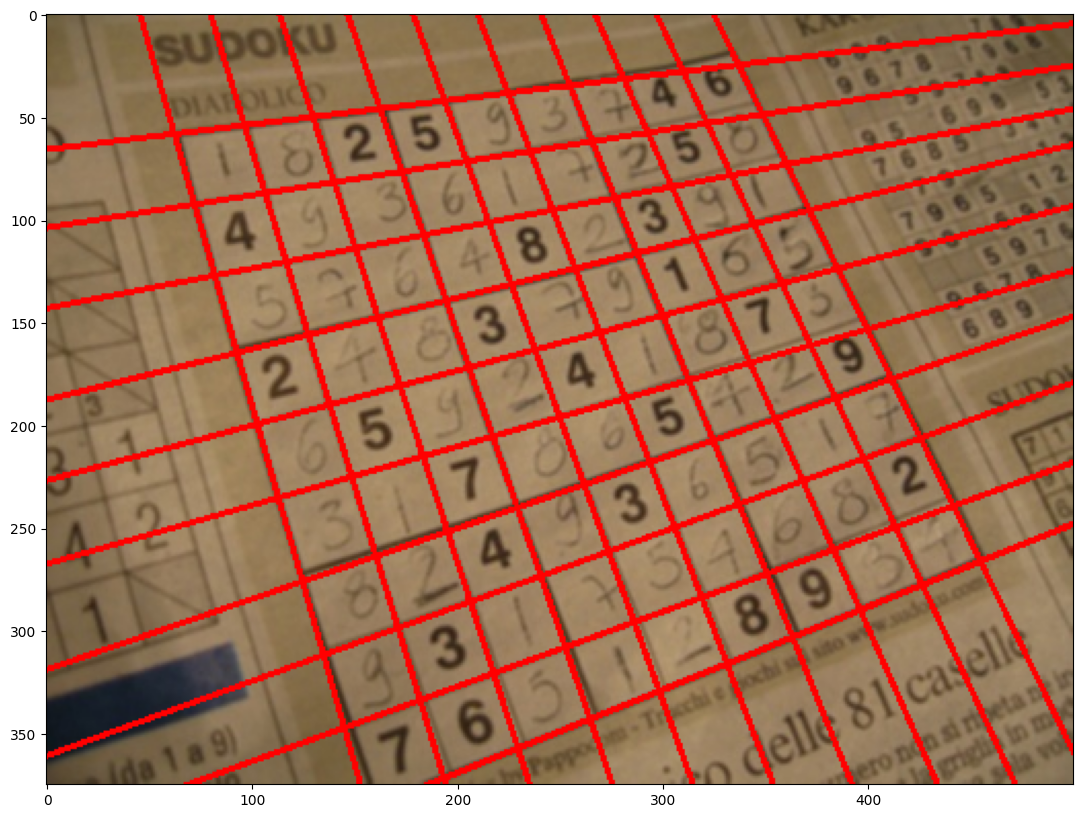

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
img = cv2.imread('/content/drive/MyDrive/Images/Object Detection/sudoku.jpg')

# Mengkonversi ke grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(img_gray, 90, 150, apertureSize=3)

# Dilasi tepi
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

# Erosi tepi
kernel = np.ones((5, 5), np.uint8)
edges = cv2.erode(edges, kernel, iterations=1)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Memeriksa apakah ada baris yang ditemukan
if lines is None or not lines.any():
    print('No lines found')
    exit()

# Filter similar lines
if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    similar_lines = {i: [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            rho_i, theta_i = lines[i][0]
            rho_j, theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) * [True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]:
            continue
        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False

    filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]
    print('Number of filtered lines:', len(filtered_lines))
else:
    filtered_lines = lines

# Gambar garis yang terdeteksi pada gambar
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Menampilkan gambar yang telah diproses
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

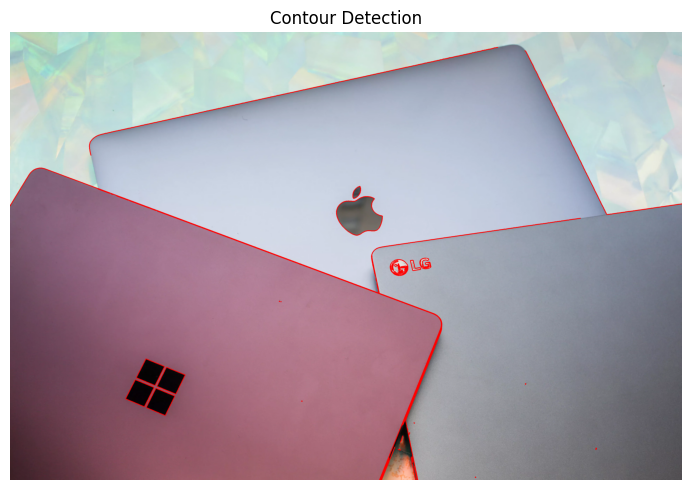

In [41]:
import cv2
import matplotlib.pyplot as plt

# Load gambar
img = cv2.imread('/content/drive/MyDrive/Images/Object Detection/laptop.jpg')

# Mengkonversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Mencari kontur pada gambar
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the contours on
result = img.copy()

# Menggambar kontur pada gambar
cv2.drawContours(result, contours, -1, (0, 0, 255), 3)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection")
plt.axis('off')
plt.tight_layout()
plt.show()

# E. Pengayaan Materi KTP

In [42]:
import cv2
import os

In [43]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/ktp3.png"
src = cv2.imread(path_plate)
blurred = src.copy()
gray = blurred.copy()

In [44]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5,5), 0.5)

168.0 (300, 493)


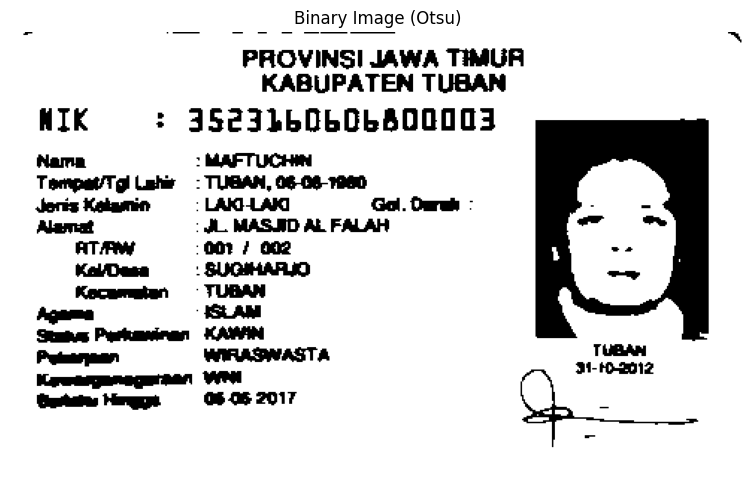

In [45]:
import cv2
import matplotlib.pyplot as plt

# Mengubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

plt.figure(figsize=(10, 5))

# Citra Biner (Thresholded Image)
plt.imshow(bw, cmap='gray')
plt.title("Binary Image (Otsu)")
plt.axis('off')

plt.tight_layout()
plt.show()

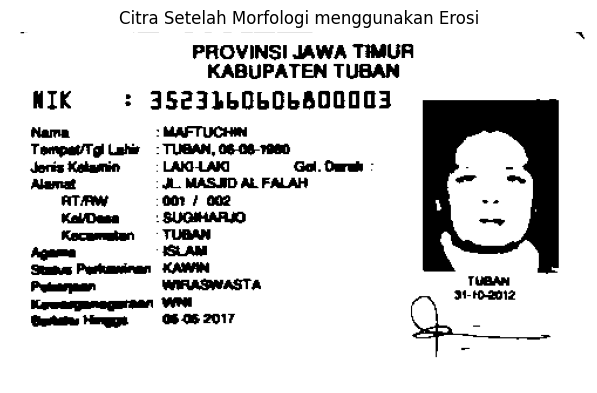

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan kernel untuk operasi morfologi
kernel = np.ones((1, 1), np.uint8)

# Menerapkan operasi morfologi menggunakan MORPH_ERODE
eroded = cv2.erode(bw, kernel, iterations=2)

# Menampilkan hasil citra morfologi dengan matplotlib
plt.figure(figsize=(12, 6))

# Citra Setelah Morfologi
plt.subplot(1, 2, 1)
plt.imshow(eroded, cmap='gray')
plt.title("Citra Setelah Morfologi menggunakan Erosi")
plt.axis('off')

plt.tight_layout()
plt.show()

Threshold value: 168.0
Ukuran citra biner: (300, 493)


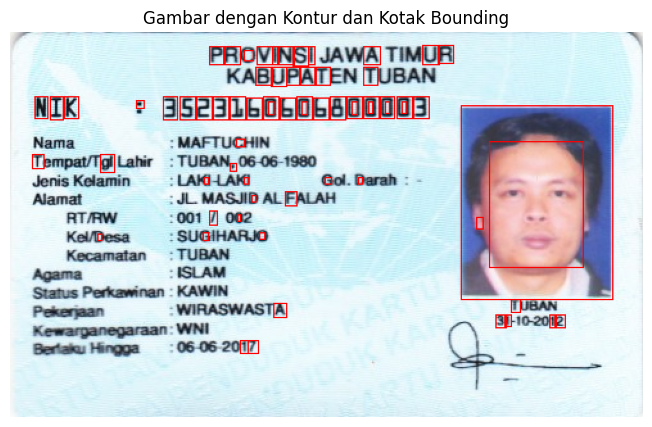

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mmebaca gambar
image_path = "/content/drive/MyDrive/PCVK/ktp3.png"
img = cv2.imread(image_path)

# Memeriksa gambar apakah berhasil dimuat
if img is None:
    print("Error: Gambar tidak ditemukan.")
else:
    # Membuat salinan gambar untuk pemrosesan
    processed_img = img.copy()

    # Blur Gaussian untuk mengurangi noise
    processed_img = cv2.GaussianBlur(processed_img, (5, 5), 0.5)

    # Konversi ke grayscale
    gray_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)

    # Thresholding Otsu untuk menghasilkan citra biner
    _, binary_img = cv2.threshold(gray_img.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print("Threshold value:", _)
    print("Ukuran citra biner:", binary_img.shape)

    # Lakukan operasi morfologi (pembukaan) untuk menghapus noise kecil
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    cleaned_binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

    # Untuk menemukan & mengekstrak kontur pada citra biner
    contours, _ = cv2.findContours(binary_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # Gambar kotak bounding di sekitar kontur yang terdeteksi
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if h >= 10 and w >= 5 and aspect_ratio <= 1:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        elif h >= 5 and w >= 2 and aspect_ratio <= 1:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)


    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Gambar dengan Kontur dan Kotak Bounding")
    plt.axis('off')
    plt.show()

# TUGAS

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:

Kelompok 3 – KTP Arief Wijaya Cimahi

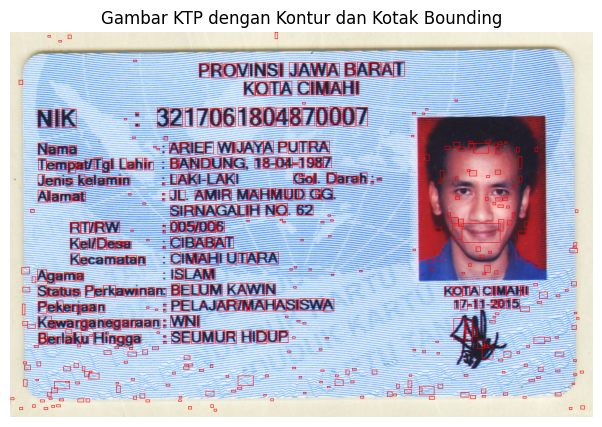

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/PCVK/ktp2.png"
ktp = cv2.imread(image_path)

# Check if the image was loaded correctly
if ktp is None:
    print("Error: Image not found.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)

    # Apply adaptive thresholding
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)

    # Apply morphological operations (opening)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bw_opened = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

    # Find contours
    contours, hierarchy = cv2.findContours(bw_opened, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around valid contours based on size and aspect ratio
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h

        if 5 <= w <= 200 and 2 <= h <= 50 and 0.2 <= aspect_ratio <= 2:
            cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

    # Display the result using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.title("Gambar KTP dengan Kontur dan Kotak Bounding")
    plt.show()

###Tambah nilai 10

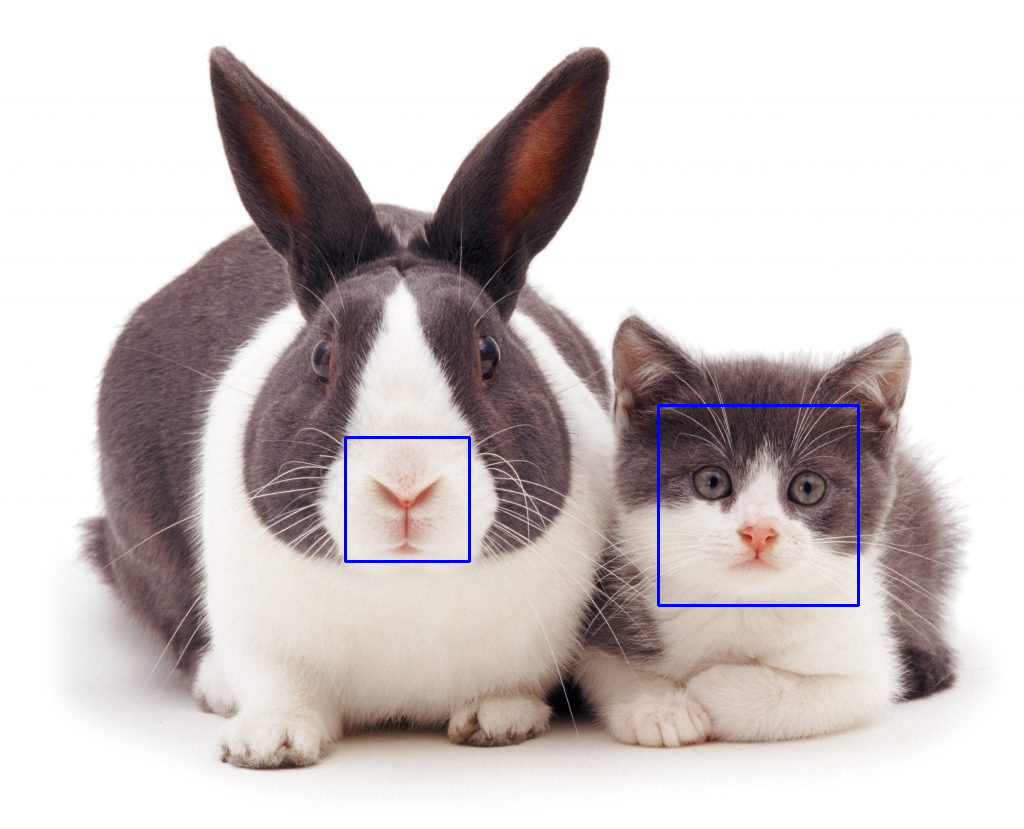

In [49]:

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface_extended.xml')

# Load the input image
image_path = '/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2_imshow(image)